In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
master_df = '/Volumes/Seagate/misc/master.csv.gz'
df = pd.read_csv(master_df, compression='gzip', sep='\t')

In [3]:
df = df[(df['status'] == 'confirmed') | (df['status'] == 'failed')]
df = df[df['timepending'] > 0]
df = df.drop_duplicates(subset=['hash'], keep='first')

In [4]:
# create a new column for actual tip
# actual tip = min(maxpriorityfee, (maxfeefergas - basefeepergas))
df['mfpglessbfpg']=df['maxfeepergas']-df['basefeepergas']
df['actualtip']=df[['maxpriorityfeepergas','mfpglessbfpg']].min(axis=1)

In [5]:
df['weighted_value']= df['actualtip'] * df['blockspending']

In [6]:
# load in OFAC.csv
ofac = '/Users/tara/Documents/SJSU/CAMCOS/camcos/CAMCOS_2023F/Data_Exploration/OFAC.csv'
ofac_df = pd.read_csv(ofac)
ofac_df

,date_added,address,name
0,2020-09-10,0x8576acc5c05d6ce88f4e49bf65bdf0c62f91353c,"ANDREYEV, Anton Nikolaeyvich"
1,2020-09-10,0x901bb9583b24d97e995513c6778dc6888ab6870e,"LIFSHITS, Artem Mikhaylovich"
2,2020-09-10,0xa7e5d5a720f06526557c513402f2e6b5fa20b008,"LIFSHITS, Artem Mikhaylovich"
3,2020-09-16,0xd882cfc20f52f2599d84b8e8d58c7fb62cfe344b,"KARASAVIDI, Dmitrii"
4,2020-09-16,0x7f367cc41522ce07553e823bf3be79a889debe1b,"POTEKHIN, Danil"
...,...,...,...
142,2023-08-23,0x797d7ae72ebddcdea2a346c1834e04d1f8df102b,"SEMENOV, Roman"
143,2023-08-23,0x931546D9e66836AbF687d2bc64B30407bAc8C568,"SEMENOV, Roman"
144,2023-08-23,0x43fa21d92141BA9db43052492E0DeEE5aa5f0A93,"SEMENOV, Roman"
145,2023-08-23,0x6be0ae71e6c41f2f9d0d1a3b8d0f75e6f6a0b46e,"SEMENOV, Roman"


In [7]:
# if the toaddress or fromaddress is in the ofac list, then df['ofac'] = 1, else df['ofac'] = 0
df['ofac'] = np.where(df['toaddress'].isin(ofac_df['address']) | df['fromaddress'].isin(ofac_df['address']), 1, 0)

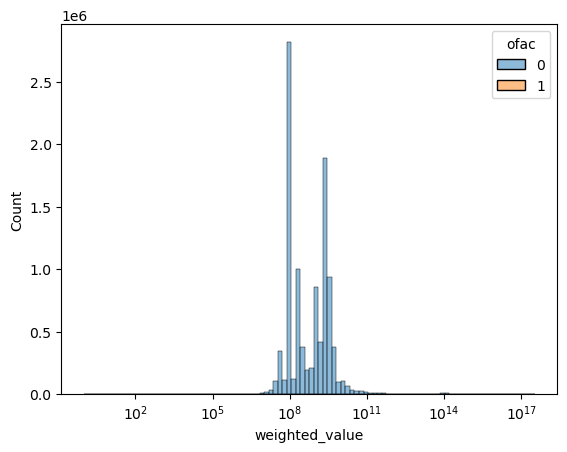

In [27]:
# plot a historgram of the weighted value, color by column df['ofac']
# subset df['weighted_value] > 0 for log_scale calculation (otherwise we divide by 0)

df2 = df[df['weighted_value'] > 0]
sns.histplot(data=df2, x='weighted_value', hue='ofac', bins=100, log_scale=True)
plt.show()


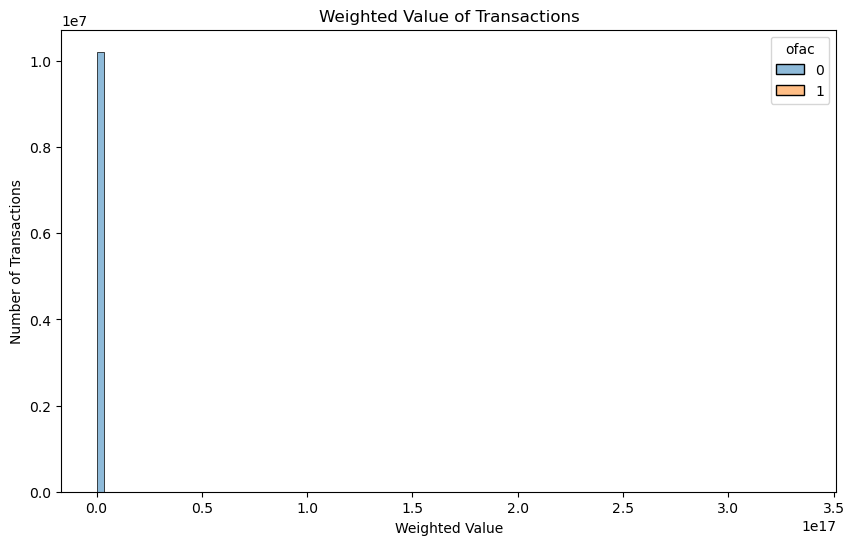

In [8]:
# plot a historgram of the weighted value, color by column df['ofac']

plt.figure(figsize=(10,6))

sns.histplot(data=df, x='weighted_value', hue='ofac', bins=100) # , log_scale=True)

plt.title('Weighted Value of Transactions')
plt.xlabel('Weighted Value')
plt.ylabel('Number of Transactions')

plt.show()
